In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

# Load Dataset

In [2]:
df = pd.read_csv('../data/raw_analyst_ratings.csv.zip', compression='zip')

## Ensure the dataset is clean

In [3]:
df.dropna(subset=['headline', 'publisher', 'date'], inplace=True)
df['date'] = pd.to_datetime(df['date'], format="mixed")


/tmp/ipykernel_163096/2676992364.py:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['date'] = pd.to_datetime(df['date'], format="mixed")


## Basic Statistics for Textual Lengths

In [4]:
df['headline_length'] = df['headline'].apply(len)
headline_stats = df['headline_length'].describe()
print("Headline Length Statistics:\n", headline_stats)

Headline Length Statistics:
 count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


## Count Articles per Publisher

In [5]:
publisher_counts = df['publisher'].value_counts()
print("Top Publishers:\n", publisher_counts.head(10))

Top Publishers:
 publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


# Analyze Publication Dates

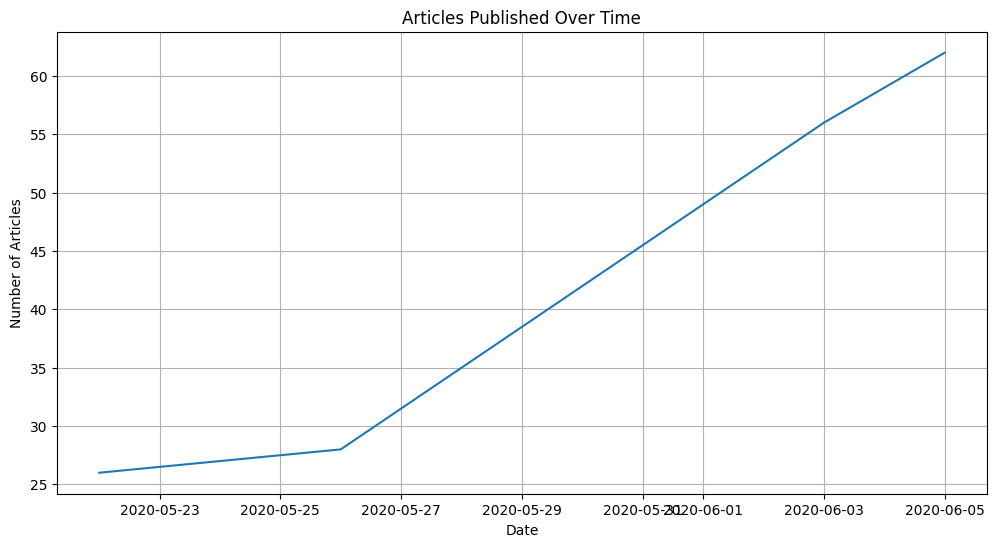

In [6]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
articles_per_day = df.groupby(df['date'].dt.date).size()
plt.figure(figsize=(12, 6))
articles_per_day.plot(kind='line', title='Articles Published Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid()
plt.show()

# Text Analysis - Sentiment Analysis

In [9]:
import nltk
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()
df['sentiment_score'] = df['headline'].apply(lambda x: sia.polarity_scores(x)['compound'])
df['sentiment'] = df['sentiment_score'].apply(lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral')
sentiment_counts = df['sentiment'].value_counts()
print("Sentiment Distribution:\n", sentiment_counts)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/abdurhman/nltk_data...


Sentiment Distribution:
 sentiment
neutral     731893
positive    448740
negative    226695
Name: count, dtype: int64


# Text Analysis - Keyword Extraction

In [ ]:
vectorizer = CountVectorizer(max_features=20, stop_words='english')
X = vectorizer.fit_transform(df['headline'])
keywords = vectorizer.get_feature_names_out()
print("Top Keywords:\n", keywords)

# Time Series Analysis - Publication Frequency Over Time

In [ ]:
plt.figure(figsize=(12, 6))
df.groupby(df['date'].dt.date).size().plot(kind='bar', title='Publication Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()

# Time Series Analysis - Publishing Times

In [ ]:
df['hour'] = df['date'].dt.hour
df.groupby('hour').size().plot(kind='bar', figsize=(10, 5), title='Articles Published by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Articles')
plt.show()

# Publisher Analysis - Contribution

In [ ]:
top_publishers = df['publisher'].value_counts().head(10)
print("Top Publishers:\n", top_publishers)